# The Dataset

The [dataset](https://www.kaggle.com/datasets/jahnavipaliwal/mountains-vs-beaches-preference) is obtained from Kaggle and authored by [Jahnavi Paliwal](https://www.kaggle.com/jahnavipaliwal).

This dataset analyses public preferences between two popular vacation types: mountains and beaches. It offers insights into various demographic and lifestyle factors that may influence these preferences. By exploring this dataset, we will apply multiple machine-learning techniques to predict whether individuals prefer mountains or beaches based on their demographic attributes.

Each row in the data provides relevant information about an individual's demographic attributes and their preferences for vacation types. The dataset contains the following columns:

1) **Travel Frequency**: Number of vacations taken per year (numerical).
2) **Preferred Activities**: Activities preferred by individuals during vacations (categorical: hiking, swimming, skiing, sunbathing).
3) **Vacation Budget**: Budget allocated for vacations (numerical).
4) **Location**: Type of residence (categorical: urban, suburban, rural).
5) **Proximity to Mountains**: Distance from the nearest mountains (numerical, in miles).
6) **Proximity to Beaches**: Distance from the nearest beaches (numerical, in miles).
7) **Favorite Season**: Preferred season for vacations (categorical: summer, winter, spring, fall).
8) **Pets**: Indicates whether the individual owns pets (binary: 0 = No, 1 = Yes).
9) **Environmental Concerns**: Indicates whether the individual has environmental concerns (binary: 0 = No, 1 = Yes).
10) **Preference**: Preferred vacation type (1 means prefers mountains, 0 for beaches).

# Code Implementation

## Import Statements

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

## Data Loading

Use this to download the dataset inside a Kaggle Notebook Environment

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
data = pd.read_csv(
    '/kaggle/input/mountains-vs-beaches-preference/mountains_vs_beaches_preferences.csv')

Use this to download the dataset inside a Jupyter Notebook Environment

In [2]:
import kagglehub

path = kagglehub.dataset_download(
    "jahnavipaliwal/mountains-vs-beaches-preference")

print("Path to dataset files:", path)

data = pd.read_csv(path + "/mountains_vs_beaches_preferences.csv")

Path to dataset files: /Users/alicagatay/.cache/kagglehub/datasets/jahnavipaliwal/mountains-vs-beaches-preference/versions/1


## Data Exploration

In [3]:
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [4]:
data.isnull().sum()

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

## Data Preprocessing

### One-Hot Encoding Categorical Variables

In [5]:
data_encoded = pd.get_dummies(
    data, columns=['Gender', 'Education_Level', 'Preferred_Activities', 'Location', 'Favorite_Season'])

In [6]:
data_encoded.head(10)

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference,Gender_female,...,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Location_rural,Location_suburban,Location_urban,Favorite_Season_fall,Favorite_Season_spring,Favorite_Season_summer,Favorite_Season_winter
0,56,71477,9,2477,175,267,0,1,1,False,...,True,False,False,False,False,True,False,False,True,False
1,69,88740,1,4777,228,190,0,1,0,False,...,False,False,True,False,True,False,True,False,False,False
2,46,46562,0,1469,71,280,0,0,1,True,...,True,False,False,False,False,True,False,False,False,True
3,32,99044,6,1482,31,255,1,0,1,False,...,False,False,False,True,False,False,False,False,True,False
4,60,106583,5,516,23,151,1,1,0,True,...,False,True,False,False,True,False,False,False,False,True
5,25,110588,3,2895,6,47,0,1,0,False,...,False,True,False,False,False,True,True,False,False,False
6,38,22245,1,4994,157,225,0,1,0,False,...,False,False,True,True,False,False,True,False,False,False
7,56,109411,8,3656,210,166,1,0,0,False,...,False,True,False,False,False,True,False,False,False,True
8,36,22531,6,2408,218,263,1,1,0,False,...,False,False,True,False,True,False,False,False,True,False
9,40,90840,1,4044,271,15,1,1,0,False,...,False,False,True,True,False,False,False,False,True,False


### Separating Features and Target

In [7]:
X = data_encoded.drop(columns=['Preference'])

y = data_encoded['Preference']

### Appying SMOTE for Imbalanced Data

In [14]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

### Splitting the Data into Training and Testing Sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Building and Comparing Different Machine Learning Models

### kNN (k-Nearest Neighbors) Classifier

#### Building The Model

In [16]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=1)

model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Evaluating The Model

In [17]:
model_knn_prediction = model_knn.predict(X_test.values)

print(classification_report(y_test, model_knn_prediction))

/opt/homebrew/Caskroom/miniforge/base/envs/bcu_environment/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.72      0.81      7930
           1       0.77      0.93      0.84      7789

    accuracy                           0.82     15719
   macro avg       0.84      0.83      0.82     15719
weighted avg       0.84      0.82      0.82     15719



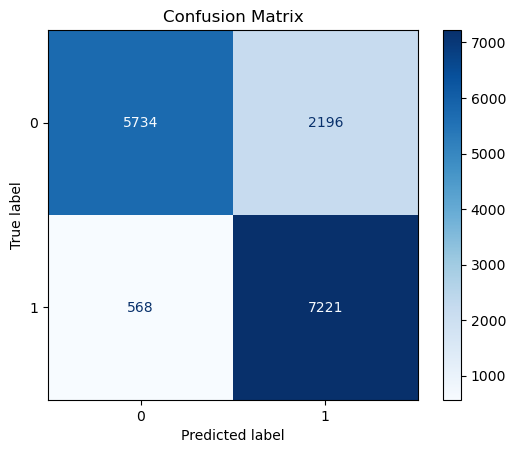

In [24]:
knn_confusion_matrix = confusion_matrix(y_test, model_knn_prediction)

knn_confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=knn_confusion_matrix, display_labels=model_knn.classes_)

knn_confusion_matrix_display.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.show()

### Neural Network Classifier

#### Building The Model

In [45]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(
    64, 32, 16), max_iter=1000, verbose=True, random_state=42, alpha=0.01)

model_mlp.fit(X_train, y_train)

Iteration 1, loss = 14.39271597
Iteration 2, loss = 10.13571472
Iteration 3, loss = 6.80315884
Iteration 4, loss = 6.92363120
Iteration 5, loss = 6.15925774
Iteration 6, loss = 7.19413441
Iteration 7, loss = 8.20356110
Iteration 8, loss = 5.60734428
Iteration 9, loss = 5.17094269
Iteration 10, loss = 5.37190284
Iteration 11, loss = 7.36604689
Iteration 12, loss = 3.43364050
Iteration 13, loss = 5.37213477
Iteration 14, loss = 4.06849023
Iteration 15, loss = 4.89517330
Iteration 16, loss = 5.79194325
Iteration 17, loss = 3.30501383
Iteration 18, loss = 6.41628913
Iteration 19, loss = 2.61499149
Iteration 20, loss = 3.18250626
Iteration 21, loss = 3.21342318
Iteration 22, loss = 2.97255880
Iteration 23, loss = 2.66040020
Iteration 24, loss = 3.22461536
Iteration 25, loss = 2.08515853
Iteration 26, loss = 1.76592859
Iteration 27, loss = 2.72541994
Iteration 28, loss = 2.71365237
Iteration 29, loss = 1.75219910
Iteration 30, loss = 3.28644000
Iteration 31, loss = 1.07703554
Iteration 32, l

MLPClassifier(alpha=0.01, hidden_layer_sizes=(64, 32, 16), max_iter=1000,
              random_state=42, verbose=True)

#### Evaluating The Model

In [46]:
model_mlp_prediction = model_mlp.predict(X_test)

print(classification_report(y_test, model_mlp_prediction))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      7930
           1       0.86      1.00      0.92      7789

    accuracy                           0.92     15719
   macro avg       0.93      0.92      0.92     15719
weighted avg       0.93      0.92      0.92     15719



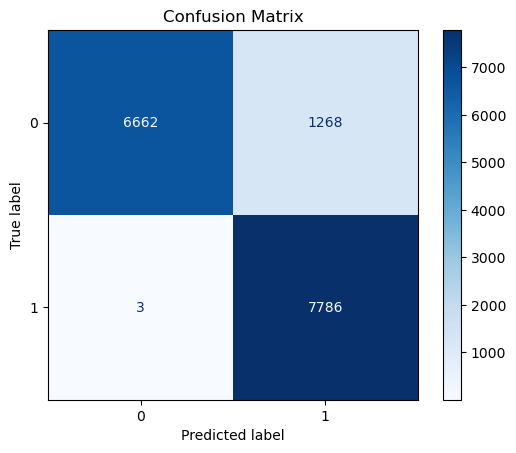

In [47]:
mlp_confusion_matrix = confusion_matrix(y_test, model_mlp_prediction)

mlp_confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=mlp_confusion_matrix, display_labels=model_mlp.classes_)

mlp_confusion_matrix_display.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.show()

### Random Forest Classifier

### Logistic Regression Classifier

### Support Vector Machine(SVM) Classifier

### Naive Bayes Classifier

### Gradient Boosting Classifier